In [116]:
import matplotlib as plt
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
import os

In [117]:
image_height = 256
image_width = 256
batch_size = 32
epochs = 50

In [118]:
ImageFlow = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255,  
    shear_range=0.2, 
    zoom_range=0.2, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    rotation_range=40, 
    horizontal_flip=True, 
    fill_mode='nearest' 
)

In [119]:
train_generator = ImageFlow.flow_from_directory(
    directory="train",
    target_size=(image_width, image_height),
    color_mode='rgb',
    batch_size=batch_size,        
    class_mode='categorical'
)

Found 1210 images belonging to 4 classes.


In [120]:
validation_generator = ImageFlow.flow_from_directory(
    directory="validation",
    target_size=(image_width, image_height),
    color_mode='rgb',
    batch_size=batch_size,        
    class_mode='categorical',
)

Found 400 images belonging to 4 classes.


In [121]:
steps_per_epoch = train_generator.n//train_generator.batch_size
steps_per_epoch

37

In [122]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3, 3), activation='relu', input_shape=(image_height,image_width,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3, 3), activation='relu', input_shape=(image_height,image_width,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3, 3), activation='relu', input_shape=(image_height,image_width,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3, 3), activation='relu', input_shape=(image_height,image_width,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3, 3), activation='relu', input_shape=(image_height,image_width,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [123]:
trained_model = model.fit(x=train_generator, validation_data=validation_generator, steps_per_epoch=steps_per_epoch, epochs=epochs, batch_size=batch_size)

Epoch 1/50
37/37 [==============================] - 104s 3s/step - loss: 1.3126 - accuracy: 0.3701 - val_loss: 0.9591 - val_accuracy: 0.6325
Epoch 2/50
37/37 [==============================] - 96s 3s/step - loss: 1.0316 - accuracy: 0.5433 - val_loss: 0.8441 - val_accuracy: 0.6300
Epoch 3/50
37/37 [==============================] - 92s 2s/step - loss: 0.6994 - accuracy: 0.7530 - val_loss: 0.6855 - val_accuracy: 0.7375
Epoch 4/50
37/37 [==============================] - 93s 3s/step - loss: 0.5257 - accuracy: 0.8302 - val_loss: 0.3738 - val_accuracy: 0.8675
Epoch 5/50
37/37 [==============================] - 92s 2s/step - loss: 0.4133 - accuracy: 0.8599 - val_loss: 0.3482 - val_accuracy: 0.8575
Epoch 6/50
37/37 [==============================] - 93s 3s/step - loss: 0.3841 - accuracy: 0.8744 - val_loss: 0.3936 - val_accuracy: 0.8650
Epoch 7/50
37/37 [==============================] - 96s 3s/step - loss: 0.3949 - accuracy: 0.8767 - val_loss: 0.3712 - val_accuracy: 0.8950
Epoch 8/50
37/37 [=

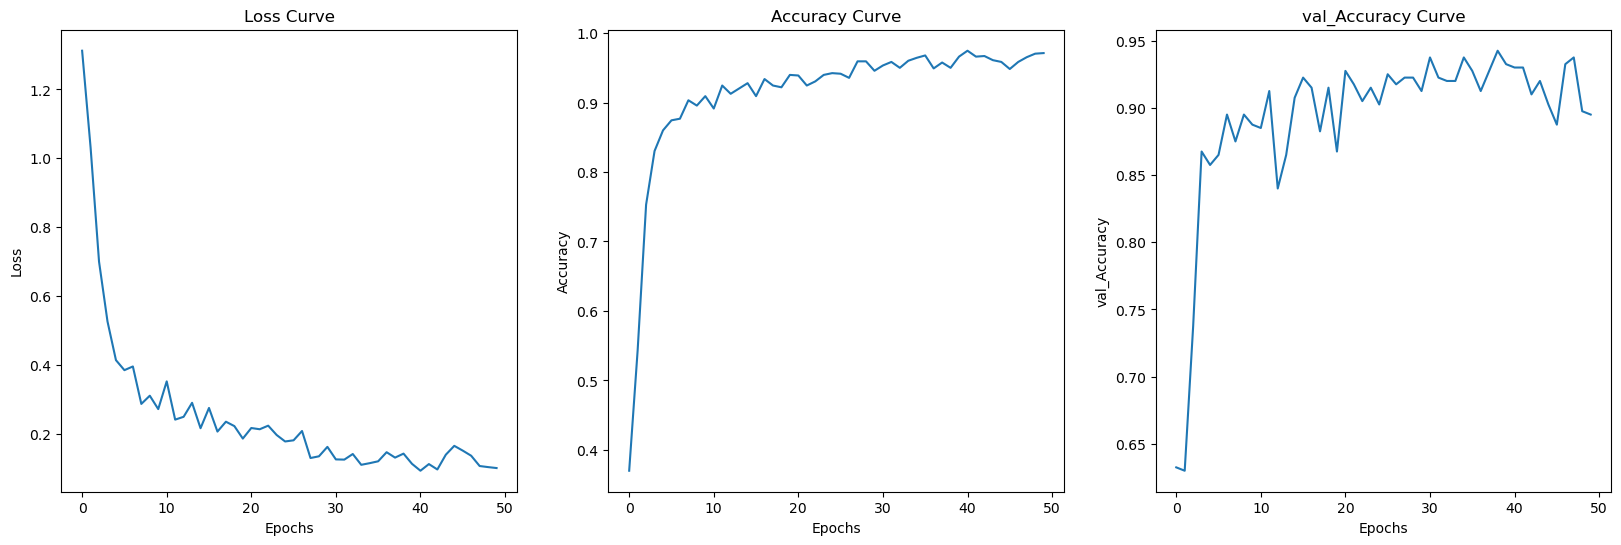

In [124]:
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
ax[0].plot(trained_model.history['loss'])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss Curve')

ax[1].plot(trained_model.history['accuracy'])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy Curve')

ax[2].plot(trained_model.history['val_accuracy'])
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('val_Accuracy')
ax[2].set_title('val_Accuracy Curve')

plt.show()

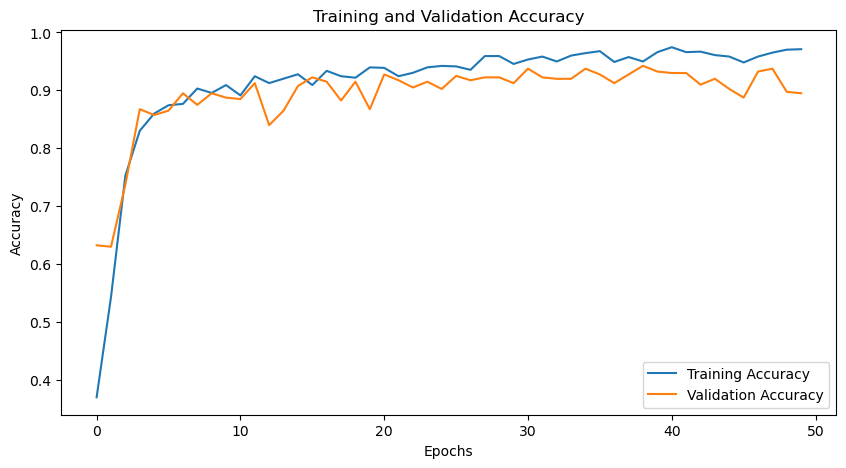

In [125]:
plt.figure(figsize=(10, 5))
plt.plot(trained_model.history['accuracy'], label='Training Accuracy')
plt.plot(trained_model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [126]:
test_data = []
for file_name in os.listdir('test'):
        if file_name.endswith(('.jpg')):
            class_label = file_name.split('_')[0]
            file_path = os.path.join('test', file_name)
            test_data.append((file_path, class_label))

df = pd.DataFrame(test_data, columns=['test_image_name', 'class'])
test_datagenerate = ImageDataGenerator(rescale=1./255) 

test_generator = test_datagenerate.flow_from_dataframe(
    dataframe=df,
    x_col='test_image_name', 
    y_col='class',  
    target_size=(image_width, image_height),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical', 
    shuffle=False  
)

Found 60 validated image filenames belonging to 4 classes.


In [127]:
loss, accuracy = model.evaluate(x=test_generator)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

2/2 [==============================] - 2s 682ms/step - loss: 0.7691 - accuracy: 0.9167
Test Loss: 0.7691473364830017
Test Accuracy: 0.9166666865348816


In [128]:
class_sequence = test_generator.class_indices
class_sequence

{'apple': 0, 'banana': 1, 'mixed': 2, 'orange': 3}

In [129]:
class_name =['apple', 'banana', 'mixed', 'orange']
prediceted_correct_count,predicted_accuracy  = 0, 0
predictios = model.predict(test_generator)
print("           actual class:    predicted class:")
for i, prediction in enumerate(predictios):
    predicted_fruit_name = class_name[np.argmax(prediction)]
    print(f"test{i}        {test_data[i][1]}             {predicted_fruit_name}")
    if test_data[i][1] == predicted_fruit_name:
        prediceted_correct_count += 1
predicted_accuracy = prediceted_correct_count / len(test_data)
print(f"predicted accuracy: {predicted_accuracy}")
print(f"The test data totaled {len(test_data)} and successfully predicted {prediceted_correct_count}")

2/2 [==============================] - 2s 643ms/step
           actual class:    predicted class:
test0        banana             banana
test1        banana             banana
test2        banana             banana
test3        banana             banana
test4        banana             banana
test5        banana             banana
test6        apple             apple
test7        banana             banana
test8        banana             banana
test9        banana             banana
test10        banana             banana
test11        apple             apple
test12        apple             apple
test13        banana             banana
test14        banana             apple
test15        banana             banana
test16        banana             banana
test17        banana             mixed
test18        mixed             mixed
test19        orange             orange
test20        orange             orange
test21        mixed             mixed
test22        mixed             mixed
test23